In [614]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
%matplotlib inline 

# Charts

In [636]:
# data for actual upsells
df = pd.read_csv(r'C:\Users\mabasak\OneDrive - Microsoft\FTEvents\UpsellHealth_12_31_2020.csv')

In [637]:
# actual FT Wins (FY21H1)

df.loc[(df['FTWin']==0), 'FTWin'] = 'No Upsell'
df.loc[(df['FTWin']==1), 'FTWin'] = 'Upsell'

df_entred = df[df['SegmentGroup']=='Enterprise']
df_entred = df_entred[df_entred['CustomerHealthScore']=='Red']
print("Total Enterprise E3 Health Red Accounts: {}".format(df_entred.shape[0]))
print("Total Enterprise E3 Health Red Accounts that upsold: {}".format(df_entred[df_entred['FTWin']=='Upsell'].shape[0]))
print("Total Enterprise E3 Health Red Accounts that did not upsell: {}".format(df_entred[df_entred['FTWin']=='No Upsell'].shape[0]))

Total Enterprise E3 Health Red Accounts: 4343
Total Enterprise E3 Health Red Accounts that upsold: 186
Total Enterprise E3 Health Red Accounts that did not upsell: 4157


In [609]:
# look at healthy in group 3 workloads and healthy vs unhealthy in group 1 workloads
df_group3green = df_entred[(df_entred['Aadp_Score']=='Green') | (df_entred['Aadp_Score']=='Yellow') | (df_entred['ManagedWin10_Score']=='Green') | (df_entred['ManagedWin10_Score']=='Yellow')]
print("Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10: {}".format(df_group3green.shape[0]))
print("Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 that upsold: {}".format(df_group3green[df_group3green['FTWin']=='Upsell'].shape[0]))
df_exogood = df_group3green[(df_group3green['Odsp_Score']=='Green') | (df_group3green['Odsp_Score']=='Yellow')]
print("Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 and good EXO: {}".format(df_exogood.shape[0]))
print("Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 and good EXO that upsold: {}".format(df_exogood[df_exogood['FTWin']=='Upsell'].shape[0]))

Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10: 1184
Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 that upsold: 101
Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 and good EXO: 368
Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 and good EXO that upsold: 26


In [613]:
# look at healthy in group 3 workloads and healthy vs unhealthy in group 1 workloads
df_group3green = df_entred[(df_entred['Aadp_Score']=='Green') | (df_entred['Aadp_Score']=='Yellow') | (df_entred['ManagedWin10_Score']=='Green') | (df_entred['ManagedWin10_Score']=='Yellow')]
print("Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10: {}".format(df_group3green.shape[0]))
print("Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 that upsold: {}".format(df_group3green[df_group3green['FTWin']=='Upsell'].shape[0]))
df_exogood = df_group3green[df_group3green['TeamsAllUp_MAU_PAU']>=0.6]
print("Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 and good EXO: {}".format(df_exogood.shape[0]))
print("Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 and good EXO that upsold: {}".format(df_exogood[df_exogood['FTWin']=='Upsell'].shape[0]))

Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10: 1184
Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 that upsold: 101
Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 and good EXO: 226
Total Enterprise E3 Health Red Accounts with Y/G Health in AADP or Win10 and good EXO that upsold: 16


# Comparing against actual wins

In [638]:
def plot_core(df, col_name):
    
    workload = col_name.split('_')[0]
    df.loc[df[col_name] > 1, col_name] = 1
    df.loc[df[col_name] < 0, col_name] = 0
    
    ax = df.hist(column=col_name, by='FTWin', bins=10, grid=False, figsize=(8,10), layout=(2,1), sharex=True, color='lightseagreen', zorder=2, rwidth=0.9)
    
    # Student's t-test
    dist1 = df[df['FTWin']=='Upsell'][col_name].dropna().tolist()
    dist2 = df[df['FTWin']=='No Upsell'][col_name].dropna().tolist()
    stat, p = ttest_ind(dist1, dist2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')
    
    for i,x in enumerate(ax):

        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        x.set_xlabel("{} Utilization".format(workload), labelpad=20, weight='bold', size=12)
        x.set_ylabel("Number of Accounts", labelpad=20, weight='bold', size=12)

        x.tick_params(axis='x', rotation=0)
        
        # Add lines for means
        if i == 1:
            x.axvline(df[df['FTWin']=='Upsell'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['FTWin']=='Upsell'][col_name].mean())
        if i == 0:
            x.axvline(df[df['FTWin']=='No Upsell'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['FTWin']=='No Upsell'][col_name].mean())
            
    return ax

Statistics=1.662, p=0.097
Same distributions (fail to reject H0)
0.2358599552544489
0.2748901452311827


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F42EB7B80>,
      dtype=object)

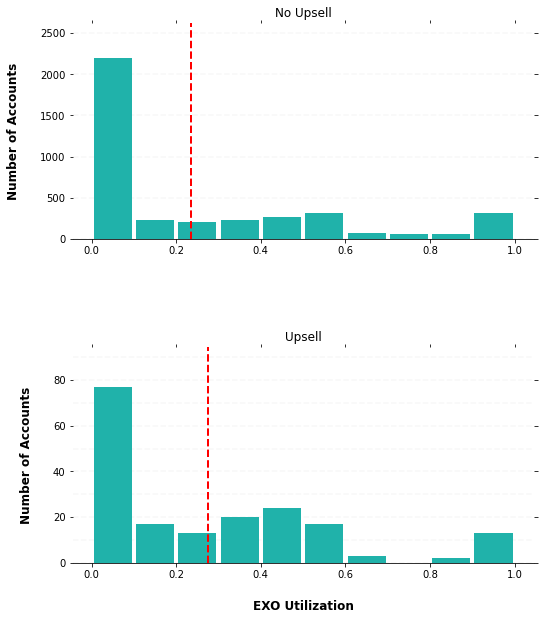

In [639]:
plot_core(df_entred, 'EXO_MAU_PAU')

Statistics=-0.442, p=0.658
Same distributions (fail to reject H0)
0.20307031606227735
0.19411877836021502


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F4761AA60>,
      dtype=object)

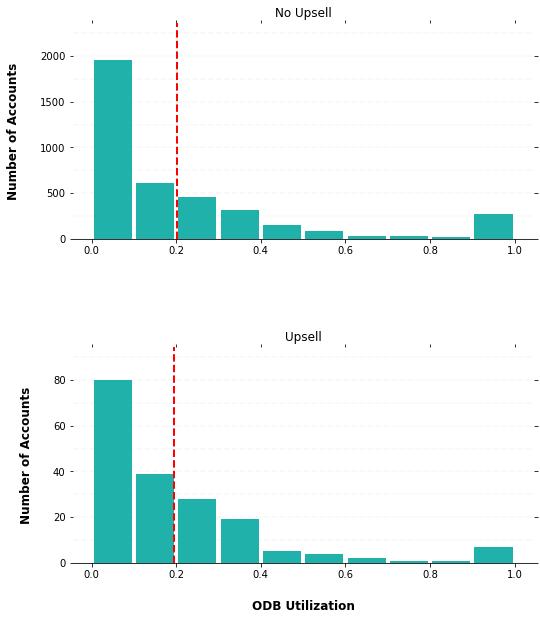

In [640]:
plot_core(df_entred, 'ODB_MAU_PAU')

Statistics=-0.267, p=0.789
Same distributions (fail to reject H0)
0.19890757781853172
0.19349323361290324


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F48317BE0>,
      dtype=object)

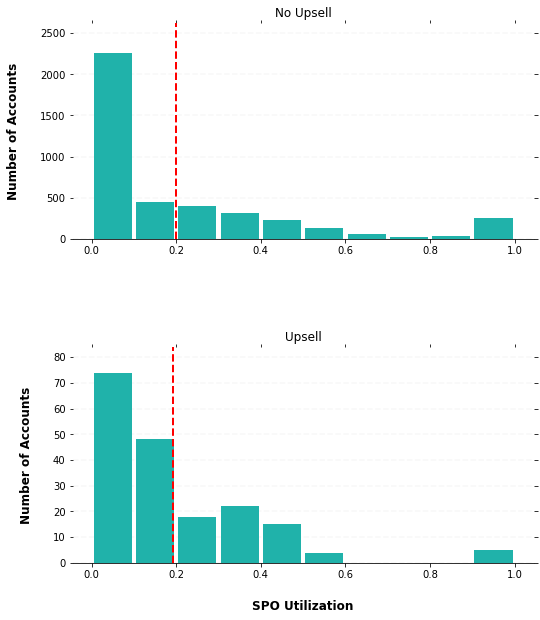

In [641]:
plot_core(df_entred, 'SPO_MAU_PAU')

Statistics=0.177, p=0.860
Same distributions (fail to reject H0)
0.3130809450411795
0.31767556426881716


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F4836C940>,
      dtype=object)

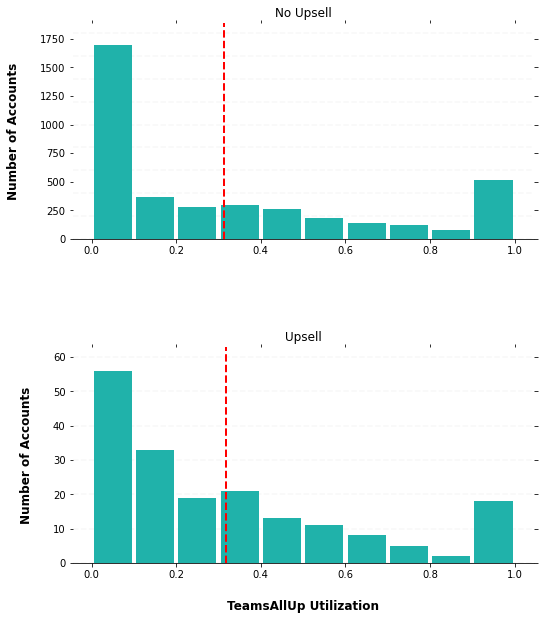

In [642]:
plot_core(df_entred, 'TeamsAllUp_MAU_PAU')

Statistics=-0.953, p=0.341
Same distributions (fail to reject H0)
0.1507070680752415
0.13183586241397857


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F500ED4F0>,
      dtype=object)

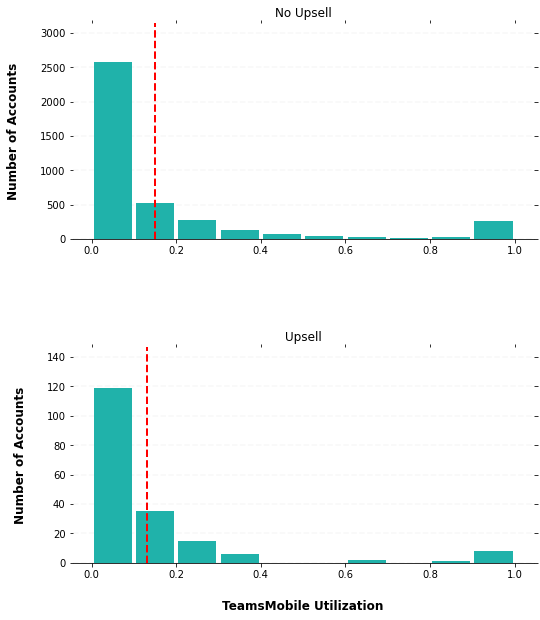

In [643]:
plot_core(df_entred, 'TeamsMobile_MAU_PAU')

Statistics=1.679, p=0.093
Same distributions (fail to reject H0)
0.06532424161006604
0.086683503016129


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F50514CA0>,
      dtype=object)

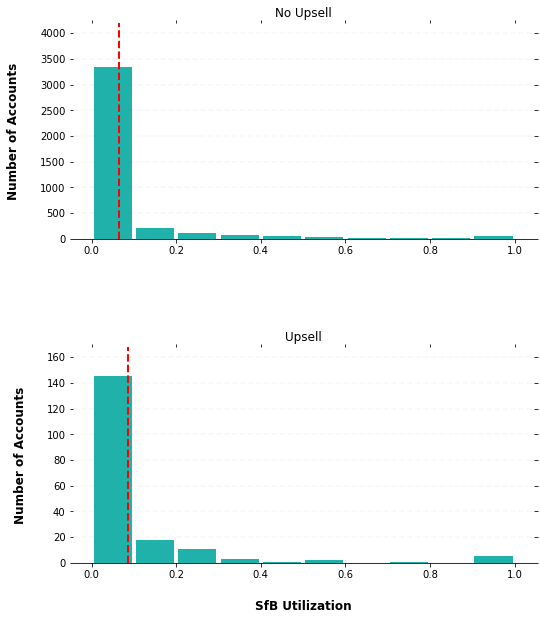

In [644]:
plot_core(df_entred, 'SfB_MAU_PAU')

Statistics=2.053, p=0.040
Different distributions (reject H0)
0.462421336698018
0.5227515437150533


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F50639790>,
      dtype=object)

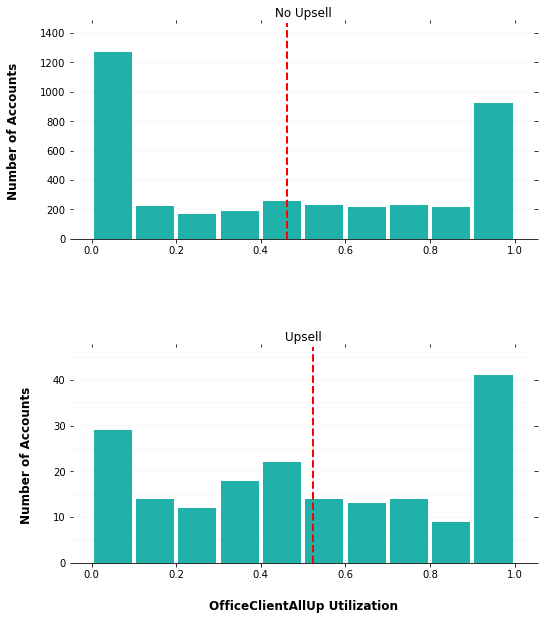

In [645]:
plot_core(df_entred, 'OfficeClientAllUp_MAU_PAU')

Statistics=-0.191, p=0.848
Same distributions (fail to reject H0)
0.07398275519205783
0.07167996679032257


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F58BC4700>,
      dtype=object)

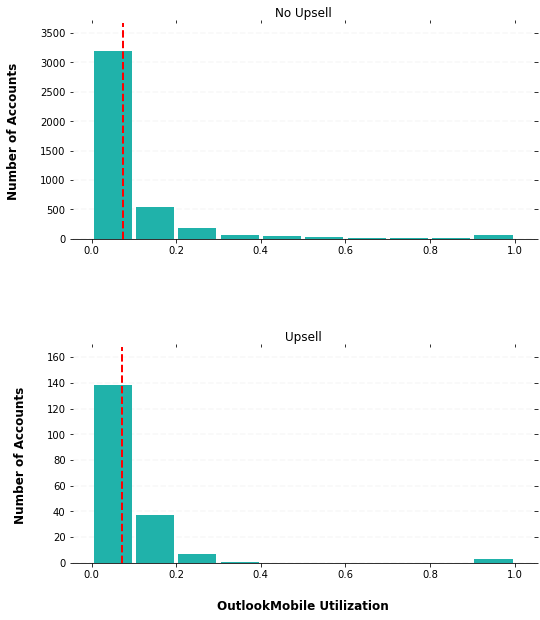

In [646]:
plot_core(df_entred, 'OutlookMobile_MAU_PAU')

In [647]:
def plot_sci(df, col_name):
    
    workload = col_name.split('_')[0]
    df.loc[df[col_name] > 2, col_name] = 2
    df.loc[df[col_name] < 0, col_name] = 0
    
    ax = df.hist(column=col_name, by='FTWin', bins=21, grid=False, figsize=(8,10), layout=(2,1), sharex=True, color='lightseagreen', zorder=2, rwidth=0.9)
    
    # Student's t-test
    dist1 = df[df['FTWin']=='Upsell'][col_name].dropna().tolist()
    dist2 = df[df['FTWin']=='No Upsell'][col_name].dropna().tolist()
    stat, p = ttest_ind(dist1, dist2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')
    
    for i,x in enumerate(ax):

        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        x.set_xlabel("{} Utilization".format(workload), labelpad=20, weight='bold', size=12)
        x.set_ylabel("Number of Accounts", labelpad=20, weight='bold', size=12)

        x.tick_params(axis='x', rotation=0)
        
        # Add lines for means
        if i == 1:
            x.axvline(df[df['FTWin']=='Upsell'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['FTWin']=='Upsell'][col_name].mean())
        if i == 0:
            x.axvline(df[df['FTWin']=='No Upsell'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['FTWin']=='No Upsell'][col_name].mean())
        
    return ax

In [ ]:
plot_sci(df_entred, 'AADP_Incentive_MAU_PAU')

Statistics=4.583, p=0.000
Different distributions (reject H0)
0.5201528219677246
0.7471264311182791


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5BFBBD00>,
      dtype=object)

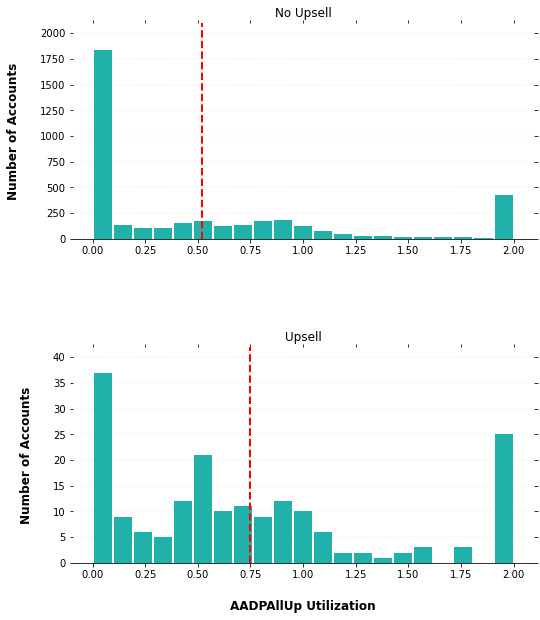

In [648]:
plot_sci(df_entred, 'AADPAllUp_MAU_PAU')

Statistics=5.263, p=0.000
Different distributions (reject H0)
0.1272326098005293
0.2987842706881721


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5C0E9730>,
      dtype=object)

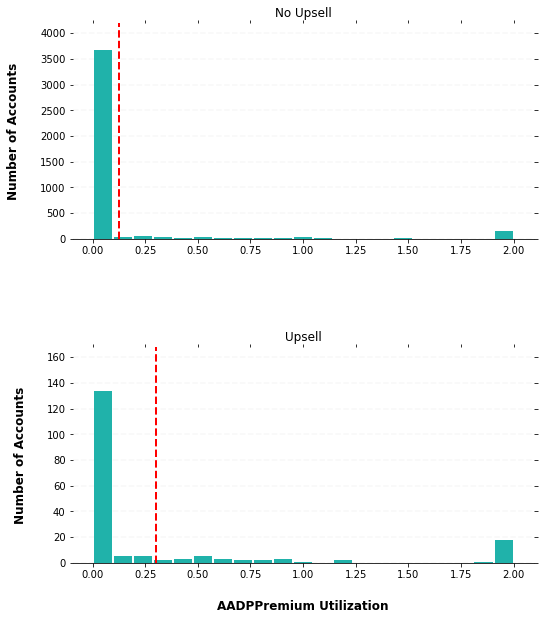

In [649]:
plot_sci(df_entred, 'AADPPremium_MAU_PAU')

Statistics=4.687, p=0.000
Different distributions (reject H0)
0.13688474567179998
0.24928078198924727


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5C4133A0>,
      dtype=object)

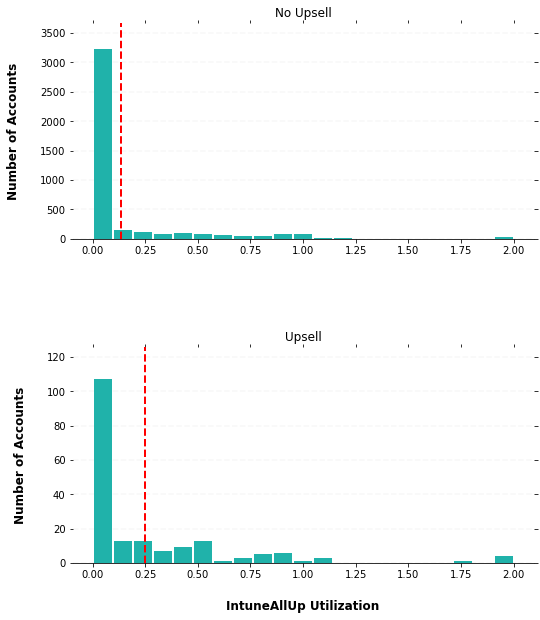

In [650]:
plot_sci(df_entred, 'IntuneAllUp_MAU_PAU')

Statistics=3.712, p=0.000
Different distributions (reject H0)
0.28957529798074655
0.4488546323172045


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5C10F640>,
      dtype=object)

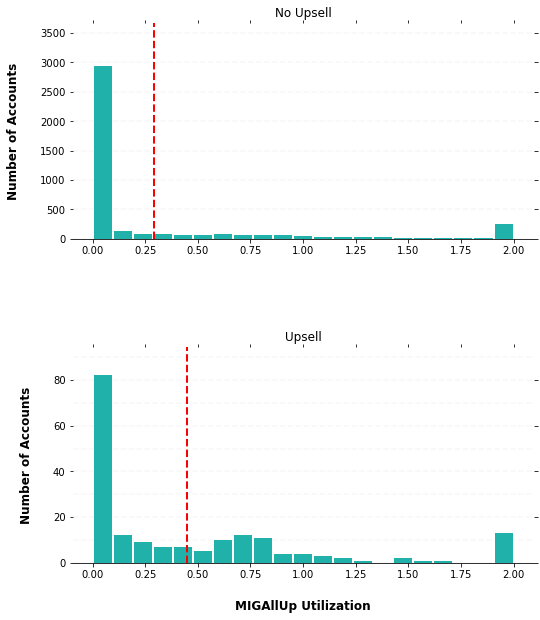

In [651]:
plot_sci(df_entred, 'MIGAllUp_MAU_PAU')

Statistics=7.074, p=0.000
Different distributions (reject H0)
0.09010251920332049
0.30350153252150536


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5C9DD5B0>,
      dtype=object)

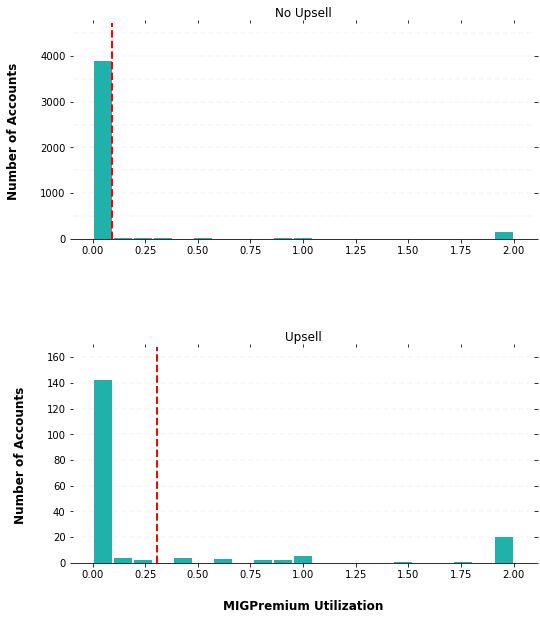

In [652]:
plot_sci(df_entred, 'MIGPremium_MAU_PAU')

Statistics=2.731, p=0.006
Different distributions (reject H0)
0.15481808558002436
0.2347375853387096


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5DF92BE0>,
      dtype=object)

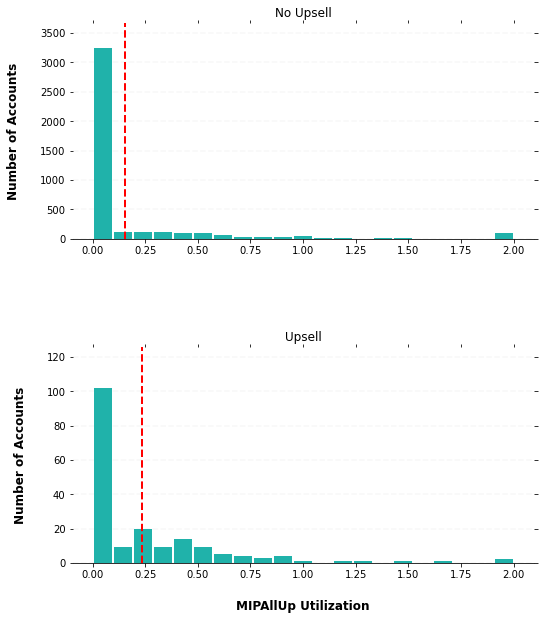

In [653]:
plot_sci(df_entred, 'MIPAllUp_MAU_PAU')

Statistics=6.192, p=0.000
Different distributions (reject H0)
0.1317491596256015
0.3534718546935484


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5DED58E0>,
      dtype=object)

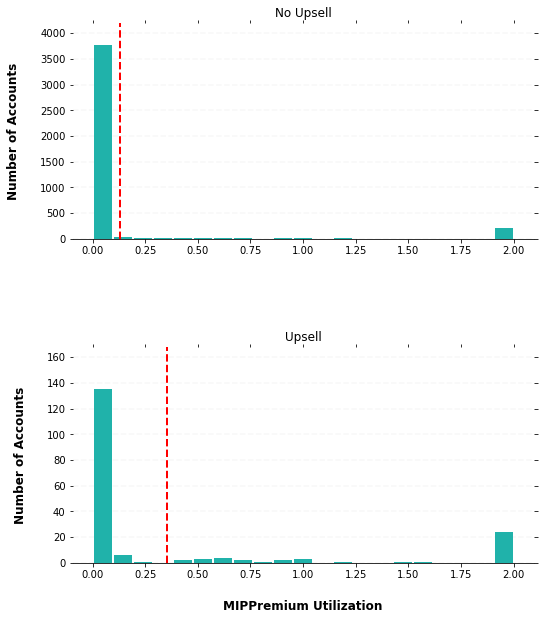

In [654]:
plot_sci(df_entred, 'MIPPremium_MAU_PAU')

Statistics=8.722, p=0.000
Different distributions (reject H0)
0.2404347892680464
0.6007247308279569


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5DF92610>,
      dtype=object)

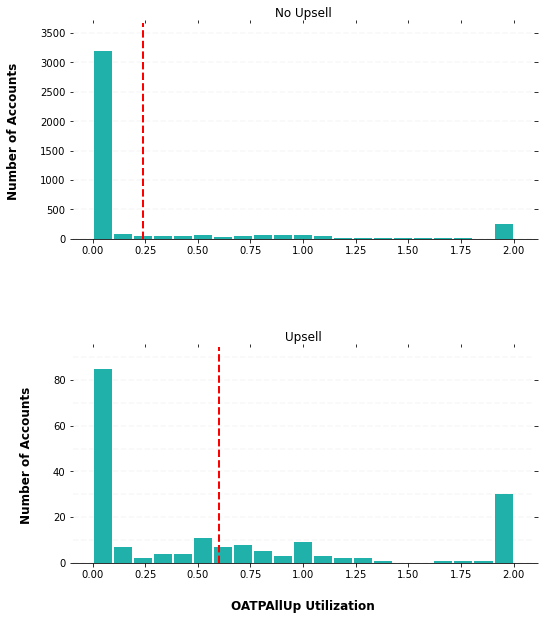

In [655]:
plot_sci(df_entred, 'OATPAllUp_MAU_PAU')

Statistics=9.111, p=0.000
Different distributions (reject H0)
0.25511025830750705
0.6825878953064516


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5E490B80>,
      dtype=object)

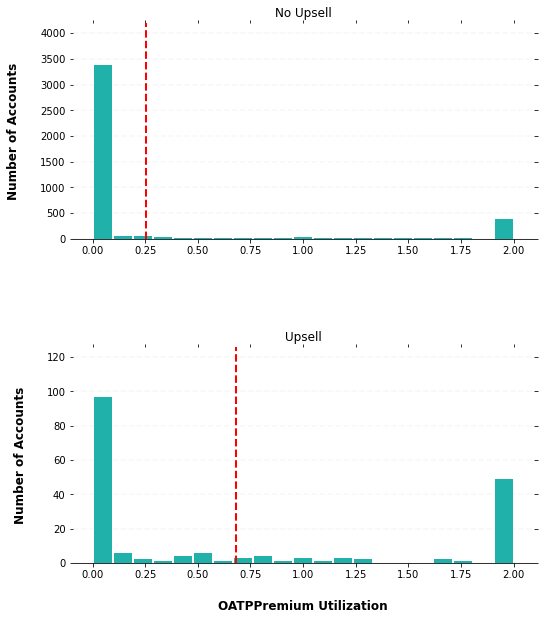

In [656]:
plot_sci(df_entred, 'OATPPremium_MAU_PAU')

Statistics=6.777, p=0.000
Different distributions (reject H0)
0.10004350359624645
0.30520740773655924


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5E7DA220>,
      dtype=object)

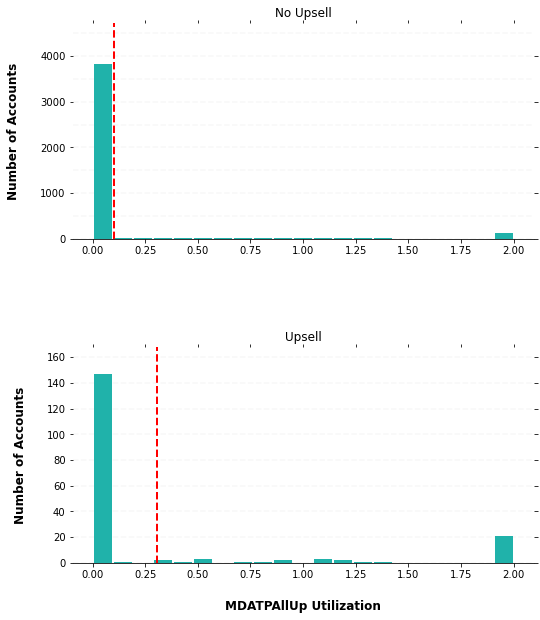

In [657]:
plot_sci(df_entred, 'MDATPAllUp_MAU_PAU')

Statistics=9.828, p=0.000
Different distributions (reject H0)
0.24597986613089504
0.6981316598709676


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F5EAB3520>,
      dtype=object)

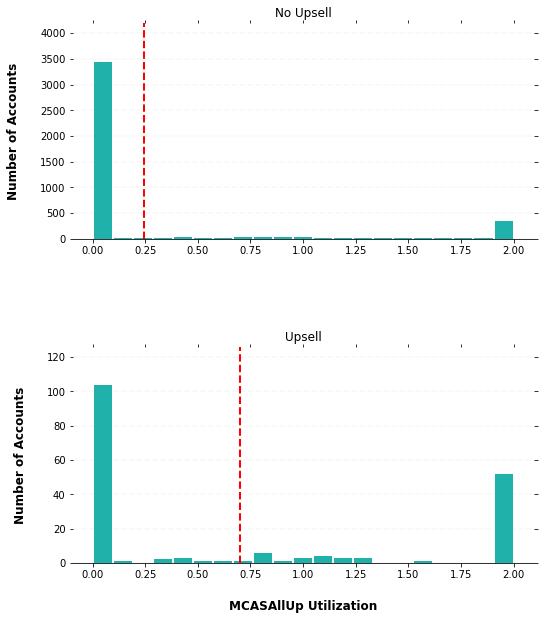

In [658]:
plot_sci(df_entred, 'MCASAllUp_MAU_PAU')

# Comparing against Propensity

In [354]:
# data for upsell propensities
df = pd.read_csv(r'C:\Users\mabasak\OneDrive - Microsoft\FTEvents\PropensityHealth_10_30_2020.csv')

In [355]:
# health and features are taken 1 month prior to propensity score snapshot (10/30/2020)
df = df[df['SegmentGroup']=='Enterprise']
df.loc[(df['Recommendation']=='Account shows low propensity for ME5 upsell in the next year') | (df['Recommendation']=='Account shows low propensity for ME5 upsell in the next year CAPPED'), 'Type'] = 'Low Propensity'
df.loc[(df['Recommendation']=='Account shows high propensity for ME5 upsell in the next year') | (df['Recommendation']=='Account shows high propensity for ME5 upsell in the next year CAPPED') | (df['Recommendation']=='Account shows medium propensity for ME5 upsell in the next year') | (df['Recommendation']=='Account shows medium propensity for ME5 upsell in the next year CAPPED'), 'Type'] = 'High or Medium Propensity'
df_red = df[df['CustomerHealthScore']=='Red']
print("Total Enterprise E3 Health Red Accounts: {}".format(df_red.shape[0]))
df_red_low = df_red[df_red['Type']=='Low Propensity']
print("Total Enterprise E3 Health Red Accounts with L ME5 Upsell Propensity: {}".format(df_red_low.shape[0]))
df_red_high = df_red[df_red['Type']=='High or Medium Propensity']
print("Total Enterprise E3 Health Red Accounts with H/M ME5 Upsell Propensity: {}".format(df_red_high.shape[0]))

Total Enterprise E3 Health Red Accounts: 2937
Total Enterprise E3 Health Red Accounts with L ME5 Upsell Propensity: 2156
Total Enterprise E3 Health Red Accounts with H/M ME5 Upsell Propensity: 781


In [356]:
def plot_core(df, col_name):
    
    workload = col_name.split('_')[0]
    df.loc[df[col_name] > 1, col_name] = 1
    df.loc[df[col_name] < 0, col_name] = 0
    
    ax = df.hist(column=col_name, by='Type', bins=10, grid=False, figsize=(8,10), layout=(2,1), sharex=True, color='lightseagreen', zorder=2, rwidth=0.9)
    
    for i,x in enumerate(ax):

        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        x.set_xlabel("{} Utilization".format(workload), labelpad=20, weight='bold', size=12)
        x.set_ylabel("Number of Accounts", labelpad=20, weight='bold', size=12)

        x.tick_params(axis='x', rotation=0)
        
        # Add lines for means
        if i == 0:
            x.axvline(df[df['Type']=='High or Medium Propensity'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['Type']=='High or Medium Propensity'][col_name].mean())
        if i == 1:
            x.axvline(df[df['Type']=='Low Propensity'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['Type']=='Low Propensity'][col_name].mean())
        
    return ax

0.22283988393213844
0.2158359252486087


C:\Users\mabasak\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F3FFE2370>,
      dtype=object)

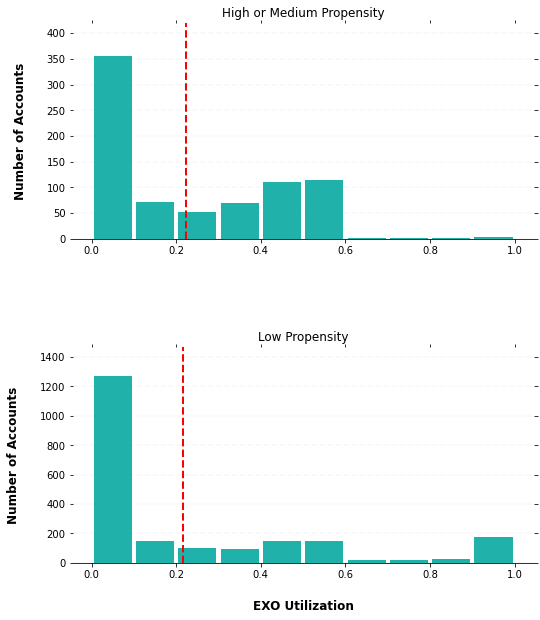

In [357]:
plot_core(df_red, 'EXO_MAU_PAU')

0.17057787752752898
0.1776184176187385


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F09E3E2E0>,
      dtype=object)

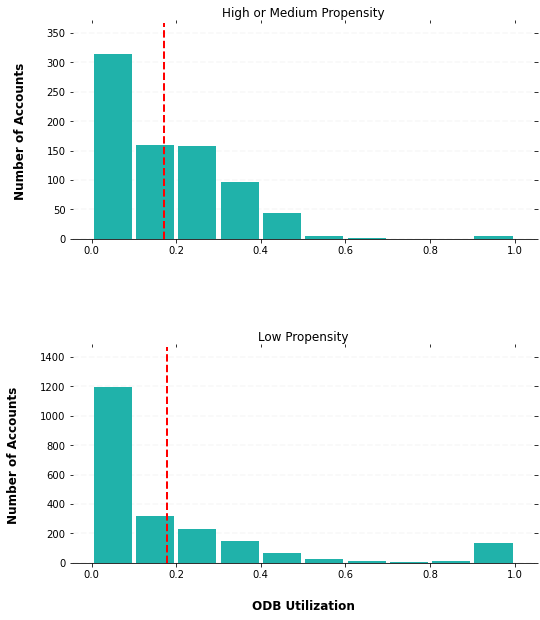

In [358]:
plot_core(df_red, 'ODB_MAU_PAU')

0.20931408664276577
0.19728404490213383


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F09F13E20>,
      dtype=object)

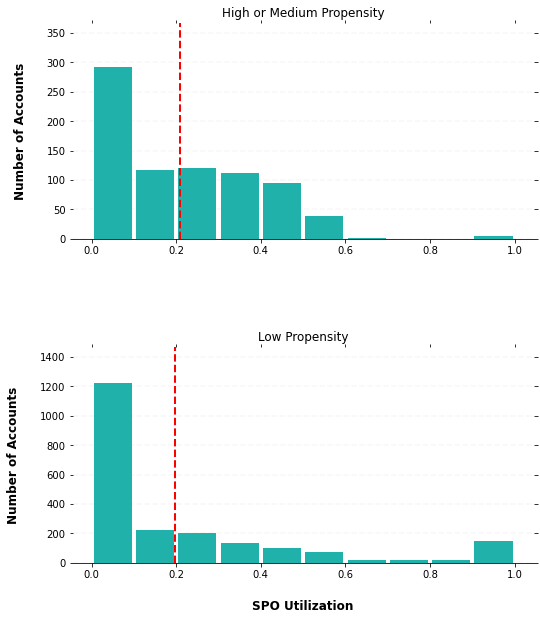

In [359]:
plot_core(df_red, 'SPO_MAU_PAU')

0.31119502067349586
0.3062421364132654


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F0B98DA00>,
      dtype=object)

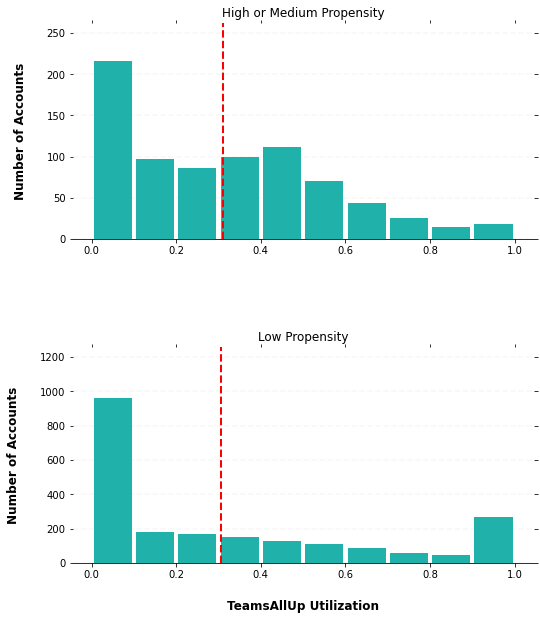

In [360]:
plot_core(df_red, 'TeamsAllUp_MAU_PAU')

0.10210895702048646
0.14107481841419298


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F0B9A1760>,
      dtype=object)

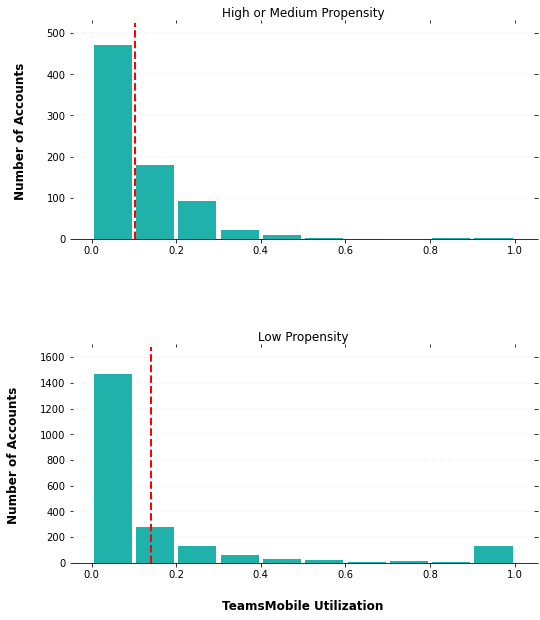

In [361]:
plot_core(df_red, 'TeamsMobile_MAU_PAU')

0.05457906801792575
0.046746755837198506


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F0B96CEB0>,
      dtype=object)

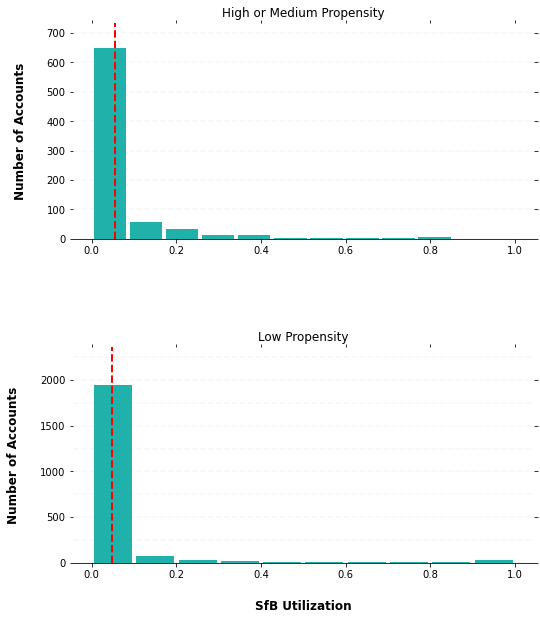

In [362]:
plot_core(df_red, 'SfB_MAU_PAU')

0.5541702518258647
0.4342007330987938


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F1FFA24C0>,
      dtype=object)

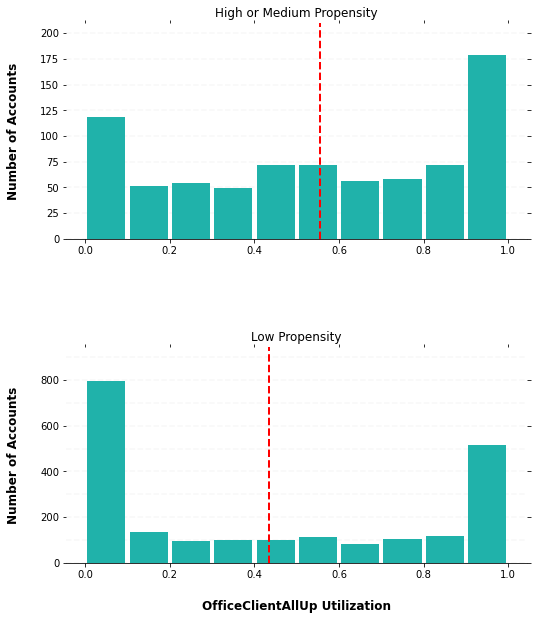

In [363]:
plot_core(df_red, 'OfficeClientAllUp_MAU_PAU')

0.06775784448527526
0.07564911365862706


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F202081C0>,
      dtype=object)

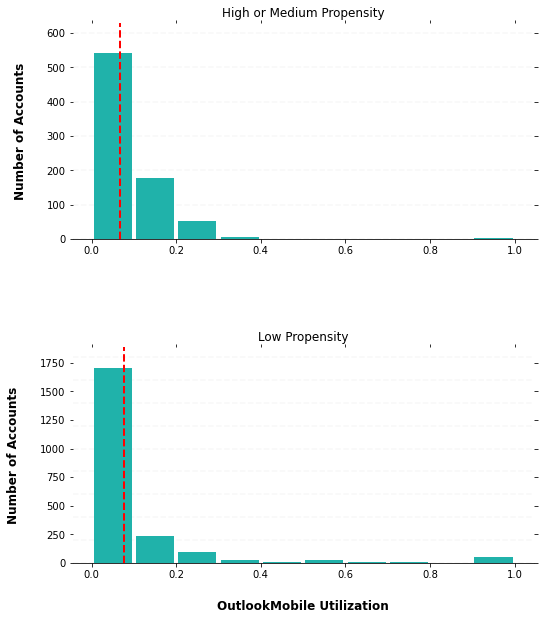

In [364]:
plot_core(df_red, 'OutlookMobile_MAU_PAU')

In [365]:
def plot_sci(df, col_name):
    
    workload = col_name.split('_')[0]
    df.loc[df[col_name] > 2, col_name] = 2
    df.loc[df[col_name] < 0, col_name] = 0
    
    ax = df.hist(column=col_name, by='Type', bins=21, grid=False, figsize=(8,10), layout=(2,1), sharex=True, color='lightseagreen', zorder=2, rwidth=0.9)
    
    for i,x in enumerate(ax):

        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        x.set_xlabel("{} Utilization".format(workload), labelpad=20, weight='bold', size=12)
        x.set_ylabel("Number of Accounts", labelpad=20, weight='bold', size=12)

        x.tick_params(axis='x', rotation=0)
        
        # Add lines for means
        if i == 0:
            x.axvline(df[df['Type']=='High or Medium Propensity'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['Type']=='High or Medium Propensity'][col_name].mean())
        if i == 1:
            x.axvline(df[df['Type']=='Low Propensity'][col_name].mean(), color='red', linestyle='dashed', linewidth=2)
            print(df[df['Type']=='Low Propensity'][col_name].mean())
        
    return ax

0.7041808606363633
0.49230268190909116


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F202CEA60>,
      dtype=object)

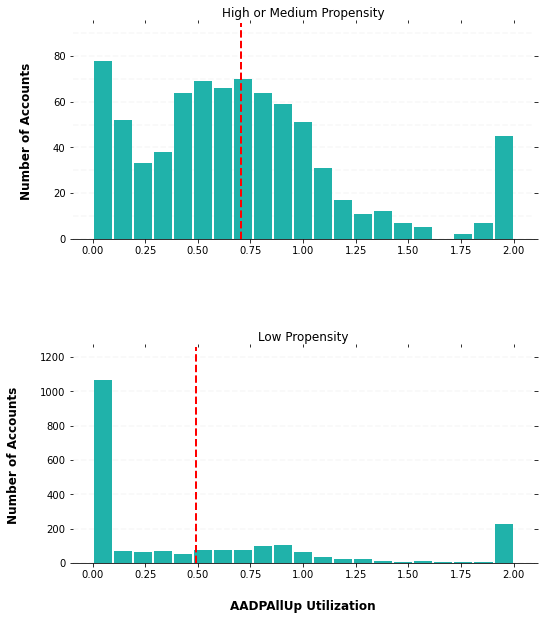

In [366]:
plot_sci(df_red, 'AADPAllUp_MAU_PAU')

0.48815607089372554
0.1346475927833951


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F2060F550>,
      dtype=object)

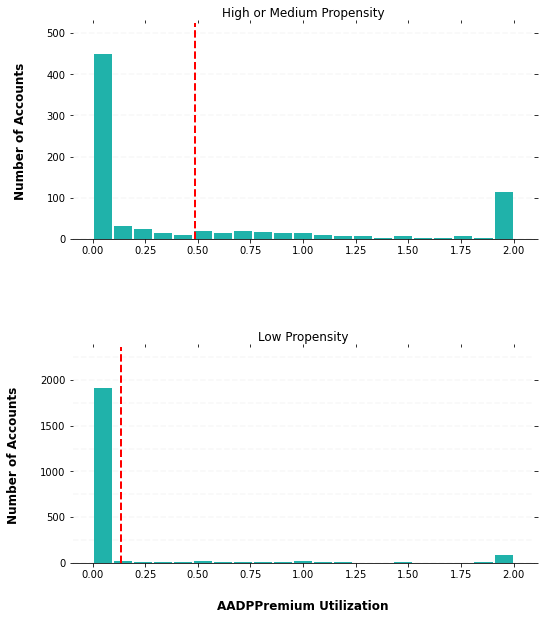

In [367]:
plot_sci(df_red, 'AADPPremium_MAU_PAU')

0.26483553333674764
0.13191197134833013


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F208E5100>,
      dtype=object)

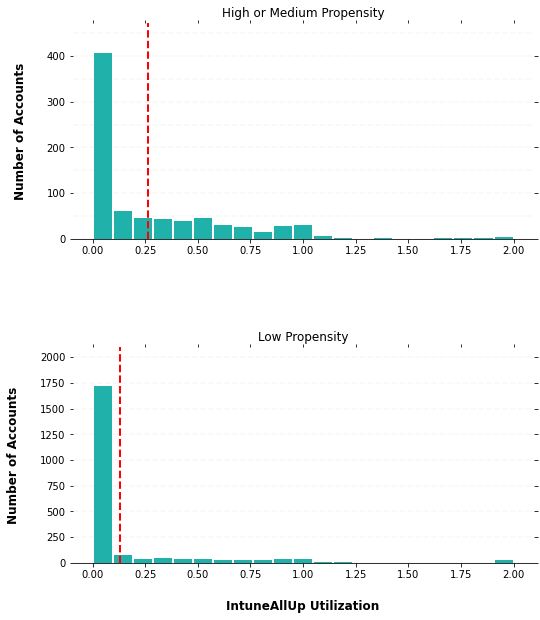

In [368]:
plot_sci(df_red, 'IntuneAllUp_MAU_PAU')

0.40085628883098634
0.21050659475498829


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F20BAD8E0>,
      dtype=object)

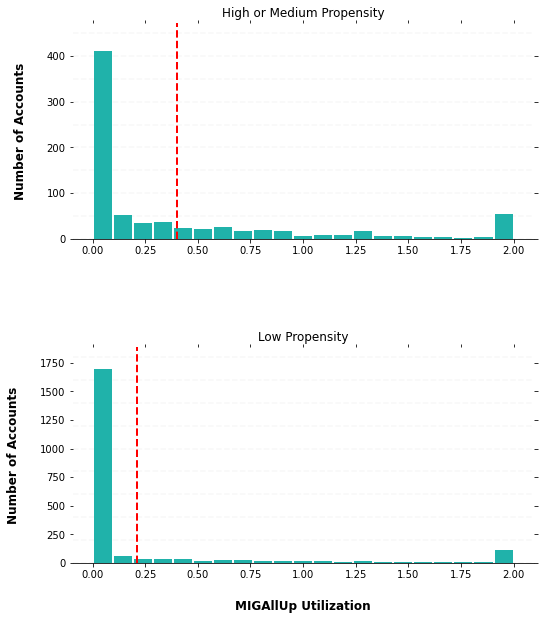

In [369]:
plot_sci(df_red, 'MIGAllUp_MAU_PAU')

0.1840518331101153
0.047422662666048235


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F20E8B370>,
      dtype=object)

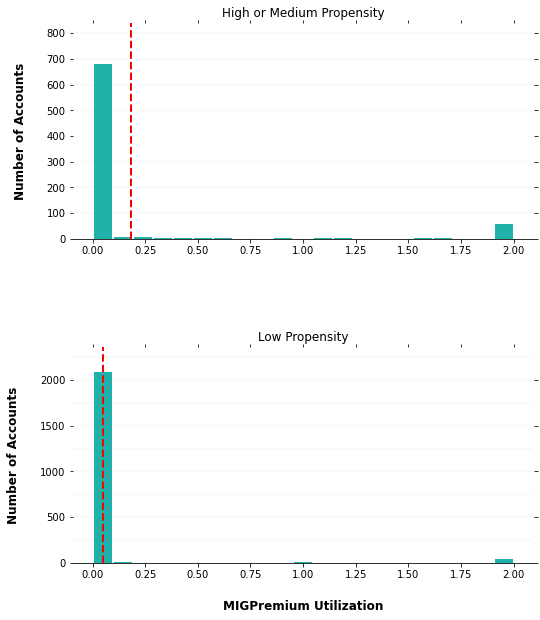

In [370]:
plot_sci(df_red, 'MIGPremium_MAU_PAU')

0.19672070495646624
0.13707931379628785


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F2147D9A0>,
      dtype=object)

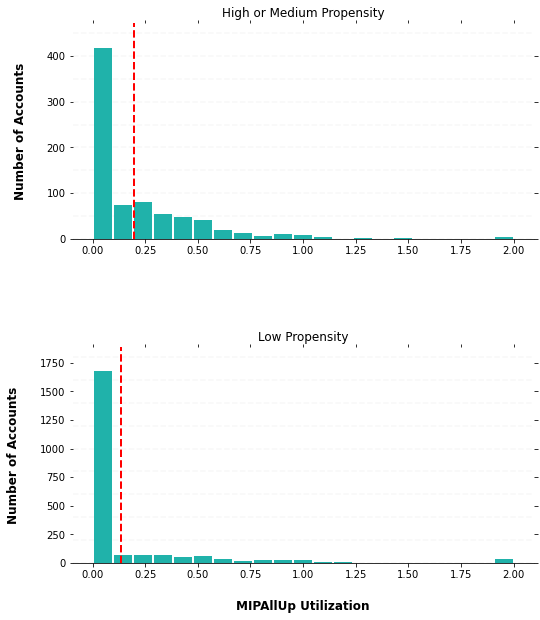

In [371]:
plot_sci(df_red, 'MIPAllUp_MAU_PAU')

0.3863624900486557
0.11289284418042671


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F2128E8E0>,
      dtype=object)

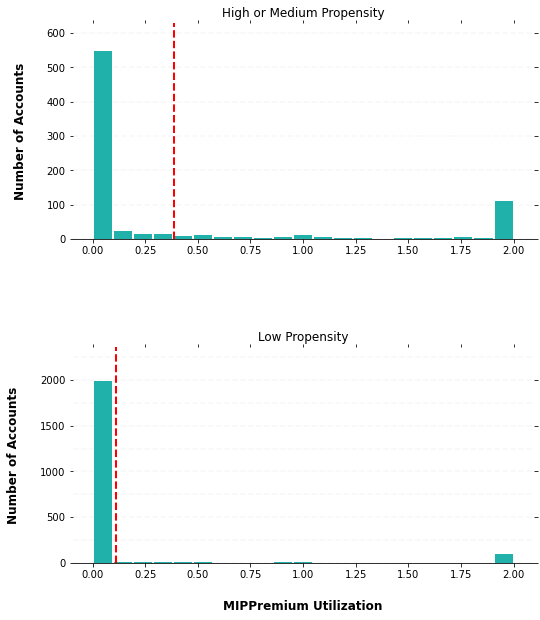

In [372]:
plot_sci(df_red, 'MIPPremium_MAU_PAU')

0.5290901867541616
0.17723749890584412


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F2170FAC0>,
      dtype=object)

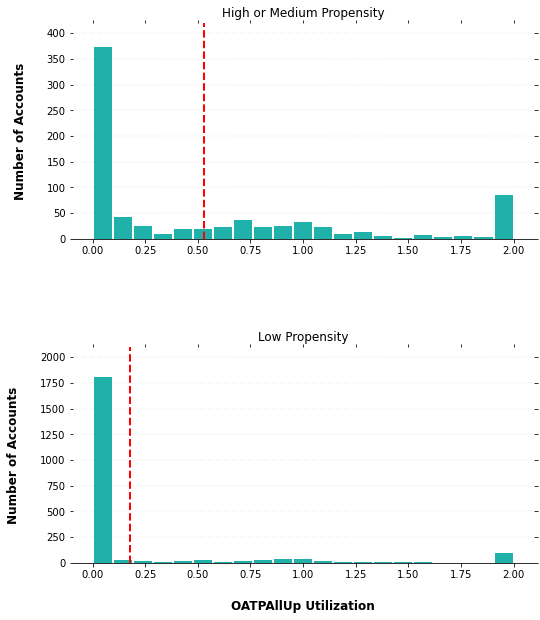

In [373]:
plot_sci(df_red, 'OATPAllUp_MAU_PAU')

0.6393248219718313
0.1721589613075139


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F2146CE20>,
      dtype=object)

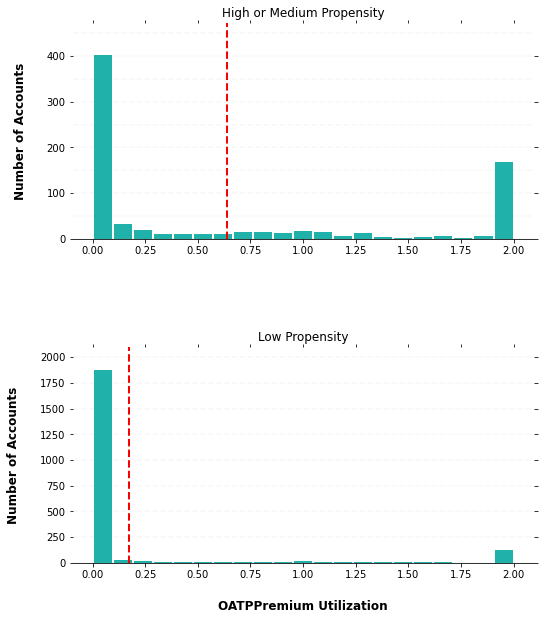

In [374]:
plot_sci(df_red, 'OATPPremium_MAU_PAU')

0.4028038534071703
0.0837575558311688


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F21CB23A0>,
      dtype=object)

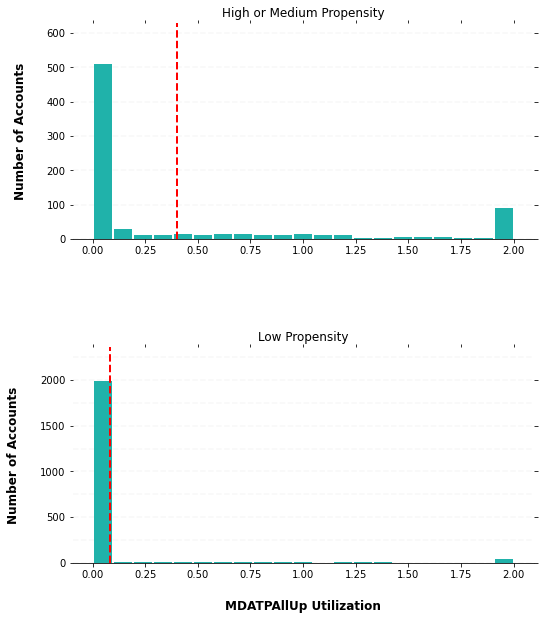

In [375]:
plot_sci(df_red, 'MDATPAllUp_MAU_PAU')

0.6909449359270169
0.15624849773562166


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023F21C86CA0>,
      dtype=object)

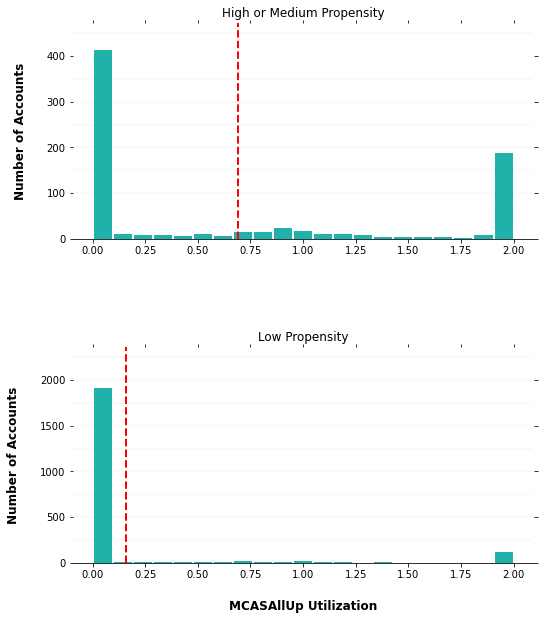

In [376]:
plot_sci(df_red, 'MCASAllUp_MAU_PAU')

# Model

In [502]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

In [503]:
# model on red enterprise accounts
print("Total Managed E3 Health Red Accounts: {}".format(df_entred.shape[0]))
print("Total Managed E3 Health Red Accounts that upsold: {}".format(df_entred[df_entred['FTWin']=='Upsell'].shape[0]))
print("Total Managed E3 Health Red Accounts that did not upsell: {}".format(df_entred[df_entred['FTWin']=='No Upsell'].shape[0]))

Total Managed E3 Health Red Accounts: 4343
Total Managed E3 Health Red Accounts that upsold: 186
Total Managed E3 Health Red Accounts that did not upsell: 4157


In [504]:
# create additional features

# enabled user rations
df_entred['AudioConf_EU_PAU'] = df_entred['AudioConferenceEnabledUsers']/df_entred['AudioConferencePaidAvailableUnits']
df_entred['PhoneSystem_EU_PAU'] = df_entred['PhoneSystemEnabledUsers']/df_entred['PhoneSystemPaidAvailableUnits']
df_entred['PowerBI_EU_PAU'] = df_entred['PowerBIEnabledUsers']/df_entred['PowerBIPaidAvailableUnits']
df_entred['PowerBIPro_EU_PAU'] = df_entred['PowerBIProEnabledUsers']/df_entred['PowerBIProPaidAvailableUnits']
df_entred['PowerBIPremium_EU_PAU'] = df_entred['PowerBIPremiumEnabledUsers']/df_entred['PowerBIPremiumPaidAvailableUnits']

# revenue ratios
df_entred['Azure_MW_RevRatio'] = df_entred['AzureRev']/df_entred['MWRev']
df_entred['Dynamics_MW_RevRatio'] = df_entred['DynamicsRev']/df_entred['MWRev']
df_entred['OnPrem_MW_RevRatio'] = df_entred['OnPremRev']/df_entred['MWRev']
df_entred['EMSCoreM365_MW_RevRatio'] = df_entred['EnterpriseMobilityCoreM365Rev']/df_entred['MWRev']
df_entred['EMSCoreNonM365_MW_RevRatio'] = df_entred['EnterpriseMobilityCoreNonM365Rev']/df_entred['MWRev']
df_entred['EMSE5CoreM365_MW_RevRatio'] = df_entred['EnterpriseMobilityE5M365Rev']/df_entred['MWRev']
df_entred['EMSE5CoreNonM365_MW_RevRatio'] = df_entred['EnterpriseMobilityE5NonM365Rev']/df_entred['MWRev']
df_entred['O365CoreM365_MW_RevRatio'] = df_entred['O365CoreM365Rev']/df_entred['MWRev']
df_entred['O365CoreNonM365_MW_RevRatio'] = df_entred['O365CoreNonM365Rev']/df_entred['MWRev']
df_entred['O365E5CoreM365_MW_RevRatio'] = df_entred['O365E5M365Rev']/df_entred['MWRev']
df_entred['O365E5CoreNonM365_MW_RevRatio'] = df_entred['O365E5NonM365Rev']/df_entred['MWRev']
df_entred['Office_MW_RevRatio'] = df_entred['OfficeRev']/df_entred['MWRev']
df_entred['PBIM365_MW_RevRatio'] = df_entred['PowerBIM365Rev']/df_entred['MWRev']
df_entred['PBINonM365_MW_RevRatio'] = df_entred['PowerBINonM365Rev']/df_entred['MWRev']
df_entred['WinCoreM365_MW_RevRatio'] = df_entred['WindowsCoreM365Rev']/df_entred['MWRev']
df_entred['WinCoreNonM365E3_MW_RevRatio'] = df_entred['WindowsCoreNonM365E3Rev']/df_entred['MWRev']
df_entred['WinCoreNonM365Ent_MW_RevRatio'] = df_entred['WindowsCoreNonM365EnterpriseRev']/df_entred['MWRev']
df_entred['WinDeviceLicensing_MW_RevRatio'] = df_entred['WindowsDeviceLicensingRev']/df_entred['MWRev']
df_entred['WinE5_MW_RevRatio'] = df_entred['WindowsE5M365Rev']/df_entred['MWRev']
df_entred['WinE5NonM365_MW_RevRatio'] = df_entred['WindowsE5NonM365Rev']/df_entred['MWRev']


In [505]:
# Remove unwanted columns and transform non numeric variables

#FTWin to binary
df_entred.loc[(df_entred['FTWin']=='No Upsell'), 'FTWin'] = 0
df_entred.loc[(df_entred['FTWin']=='Upsell'), 'FTWin'] = 1

# Area and Industry to int
df_entred['AreaNameFactors'] = pd.Categorical(df_entred.AreaName).codes
df_entred['IndustryFactors'] = pd.Categorical(df_entred.Industry).codes

df_entred = df_entred.drop(columns=['IsS2500', 'Exo_Score', 'Odsp_Score', 'OfficeMobile_Score', 'Edge_Score', 'Aadp_Score',
                                       'ManagedWin10_Score', 'Group1_Score', 'Group2_Score', 'Group3_Score', 'CustomerHealthScore',
                                       'SegmentGroup', 'AreaName', 'Industry'])

In [599]:
# keep 'FTWin' as the outcome variable
training_examples = df_entred.replace(np.nan, 0)
training_examples.replace(np.inf, 1, inplace=True)
training_examples.replace(-np.inf, 0, inplace=True)

training_customers = training_examples[['TPId']]
training_labels = training_examples[['FTWin']]
training_examples.drop(['TPId', 'FTWin'], axis=1, inplace=True)

In [535]:
training_examples.columns[(training_examples == 0).all()]

Index(['AADPPremium_ThirdParty_MAU', 'AADPAllUp_RiskBasedCa_MAU',
       'AADPPremium_RiskBasedCa_MAU', 'AADPPremium_CA_MAU',
       'AADPPremium_SaasLogin_MAU', 'PowerBIPremiumEnabledUsers',
       'PowerBIPaidAvailableUnits', 'PowerBIPremiumPaidAvailableUnits',
       'AADPAllUp_RiskBasedCa_MAU_PAU', 'OfficeRev', 'WindowsCoreM365Rev',
       'WindowsCoreNonM365E3Rev', 'WindowsCoreNonM365EnterpriseRev',
       'WindowsDeviceLicensingRev', 'PowerBIPremium_EU_PAU',
       'Office_MW_RevRatio', 'WinCoreM365_MW_RevRatio',
       'WinCoreNonM365E3_MW_RevRatio', 'WinCoreNonM365Ent_MW_RevRatio',
       'WinDeviceLicensing_MW_RevRatio'],
      dtype='object')

In [568]:
# remove all zero features
training_examples.drop(['AADPPremium_ThirdParty_MAU', 'AADPAllUp_RiskBasedCa_MAU',
       'AADPPremium_RiskBasedCa_MAU', 'AADPPremium_CA_MAU',
       'AADPPremium_SaasLogin_MAU', 'PowerBIPremiumEnabledUsers',
       'PowerBIPaidAvailableUnits', 'PowerBIPremiumPaidAvailableUnits',
       'AADPAllUp_RiskBasedCa_MAU_PAU', 'OfficeRev', 'WindowsCoreM365Rev',
       'WindowsCoreNonM365E3Rev', 'WindowsCoreNonM365EnterpriseRev',
       'WindowsDeviceLicensingRev', 'PowerBIPremium_EU_PAU',
       'Office_MW_RevRatio', 'WinCoreM365_MW_RevRatio',
       'WinCoreNonM365E3_MW_RevRatio', 'WinCoreNonM365Ent_MW_RevRatio',
       'WinDeviceLicensing_MW_RevRatio'], axis=1, inplace=True)

In [428]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(training_examples, 10))

Top Absolute Correlations
MCASPaidAvailableUnits        OATPP2PaidAvailableUnits        0.943044
OfficeClientAllUp_MAU         OutlookAllUp_MAU                0.938450
AADPAllUp_MAU                 AADPAllUp_CA_MAU                0.936073
O365E5CoreM365_MW_RevRatio    PBIM365_MW_RevRatio             0.935960
EXO_MAU                       OutlookAllUp_MAU                0.930614
MIPPremiumPaidAvailableUnits  MIGPremiumPaidAvailableUnits    0.929072
AATPPaidAvailableUnits        MCASPaidAvailableUnits          0.928548
PowerBIProPaidAvailableUnits  MIGPremiumPaidAvailableUnits    0.925526
                              MIPPremiumPaidAvailableUnits    0.924957
AATPPaidAvailableUnits        OATPP2PaidAvailableUnits        0.920514
dtype: float64


In [537]:
# remove correlated features (threshold >0.95)
to_drop = ['AADPPremium_PIM_MAU', 'AADPPremium_AccessReviews_MAU', 'IntunePremium_MAU', 'ThreatIntelligencePaidAvailableUnits',
          'OATPPremium_MAU', 'MDATPPremium_MAU', 'MCASPremium_MAU', 'AADPPremium_IP_MAU', 'PhoneSystemPaidAvailableUnits', 
          'AADPAllUp_IP_MAU_PAU', 'PhoneSystem_EU_PAU', 'AADPAllUp_IP_MAU', 'MyAnalyticsPaidAvailableUnits', 'AIPPaidAvailableUnits',
          'WindowsE5M365Rev', 'O365CoreM365Rev', 'DLPPaidAvailableUnits', 'SfBPaidAvailableUnits', 'PhoneSystemEnabledUsers', 
          'OutlookDesktop_MAU_PAU', 'O365CoreM365_MW_RevRatio', 'OD4BPaidAvailableUnits', 'WinE5_MW_RevRatio', 'O365E5M365Rev',
          'EdiscoveryPaidAvailableUnits', 'OutlookMobilePaidAvailableUnits', 'EMSE5CoreM365_MW_RevRatio', 'PowerAppsPaidAvailableUnits',
          'ODSPPaidAvailableUnits', 'OutlookMobile_MAU_PAU', 'MIGPaidAvailableUnits', 'OutlookPaidAvailableUnits', 'TeamsPaidAvailableUnits',
          'AIPP2PaidAvailableUnits', 'IntunePaidAvailableUnits', 'TeamsMobile_MAU', 'OutlookPaidAvailableUnits']
training_examples = training_examples.drop(training_examples[to_drop], axis=1)

In [589]:
# try using only usage related features
selected_features = ['AADPAllUp_MAU_PAU',
 'AADPPremium_MAU_PAU',
 'AADPAllUp_AccessReviews_MAU_Flag',
 'AADPAllUp_ThirdParty_MAU_PAU',
 'AADPAllUp_PIM_MAU_Flag',
 'AADPAllUp_CA_MAU_PAU',
 'AADPAllUp_SaasLogin_MAU_PAU',
 'IntuneAllUp_MAU_PAU',
 'MIGAllUp_MAU_PAU',
 'MIGPremium_MAU_PAU',
 'MIPAllUp_MAU_PAU',
 'MIPPremium_MAU_PAU',
 'OATPAllUp_MAU_PAU',
 'OATPPremium_MAU_PAU',
 'MDATPAllUp_MAU_PAU',
 'MCASAllUp_MAU_PAU',
 'EXO_MAU_PAU',
 'ODB_MAU_PAU',
 'OfficeClientAllUp_MAU_PAU',
 'OfficeClientDesktop_MAU_PAU',
 'OfficeClientDesktopSubscription_MAU_PAU',
 'OutlookAllUp_MAU_PAU',
 'OutlookWeb_MAU_PAU',
 'SfB_MAU_PAU',
 'SPO_MAU_PAU',
 'TeamsAllUp_MAU_PAU',
 'TeamsMobile_MAU_PAU',
 'AudioConf_EU_PAU',
 'PowerBI_EU_PAU',
 'PowerBIPro_EU_PAU',
 'Azure_MW_RevRatio',
 'Dynamics_MW_RevRatio',
 'OnPrem_MW_RevRatio',
 'EMSCoreM365_MW_RevRatio',
 'EMSCoreNonM365_MW_RevRatio',
 'EMSE5CoreNonM365_MW_RevRatio',
 'O365CoreNonM365_MW_RevRatio',
 'O365E5CoreM365_MW_RevRatio',
 'O365E5CoreNonM365_MW_RevRatio',
 'PBIM365_MW_RevRatio',
 'PBINonM365_MW_RevRatio',
 'WinE5NonM365_MW_RevRatio',
 'AreaNameFactors',
 'IndustryFactors']
training_examples = training_examples[selected_features]

In [590]:
# Random forests for feature importance

X_train, X_test, y_train, y_test = train_test_split(training_examples, training_labels, random_state=2, test_size= 0.2)
X_train[['FTWin']] = y_train
no_add = X_train[X_train.FTWin == 0]
add = X_train[X_train.FTWin == 1]
print("Majority class shape: {}".format(no_add.shape))
print("Minority class shape: {}".format(add.shape))
add_upsample = resample(add, 
                        replace=True,
                        n_samples=int(training_examples.shape[0]*0.8*0.4),
                        random_state=27)
no_add_downsample = resample(no_add,
                            replace=False,
                            n_samples=int(training_examples.shape[0]*0.8*0.6),
                            random_state=27)
X_resampled = pd.concat([add_upsample, no_add_downsample])
y_resampled = X_resampled[['FTWin']]
X_resampled = X_resampled.drop('FTWin', axis=1)


# Hyperparameter tuning -> {'n_estimators': 522, 'max_features': 'auto', 'max_depth': 100} -> Accuracy = 0.9238
# {'n_estimators': 1155, 'max_features': 'sqrt', 'max_depth': 60}
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
#max_features = ['auto', 'sqrt']
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
#random_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth}
#clf = RandomForestClassifier()
#clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#clf_random.fit(X_resampled, y_resampled)
#print(clf_random.best_params_)


# Grid search with CV -> {'max_depth': 80, 'n_estimators': 400} -> Accuracy = 0.9221
#{'max_depth': 60, 'n_estimators': 100}
#param_grid = {
#    'max_depth': [60, 70, 80, 90, 100, 110, 120],
#    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 1000, 1100, 1200]}
#clf = RandomForestClassifier()
#grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
#grid_search.fit(X_resampled, y_resampled)
#print(grid_search.best_params_)


# Model with tuned params
#clf = RandomForestClassifier(n_estimators= 1155, max_features= 'sqrt', max_depth= 60) #-> Accuracy:0.9168 , Precision:0.235 , Recall:0.205
#clf = RandomForestClassifier(n_estimators= 100, max_depth= 60) #-> Accuracy:0.9183 , Precision:0.25 , Recall:0.2179
clf = RandomForestClassifier(n_estimators=100, max_depth = 10) #-> Accuracy = 0.907 , Precision:0.231 , Recall:0.269
clf = clf.fit(X_resampled, y_resampled)
y_predict = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)
print ("Accuracy is:", accuracy_score(y_test, y_predict))
print ("Precision:", sklearn.metrics.precision_score(y_test, y_predict))
print ("Recall:", sklearn.metrics.recall_score(y_test, y_predict))


random_forest_feat_imp = clf.feature_importances_
random_forest_selected_features = []

for i in range(len(training_examples.columns)):
    feature = training_examples.columns[i]
    value = random_forest_feat_imp[i]
    random_forest_selected_features.append((feature,value))
     
random_forest_selected_features = sorted(random_forest_selected_features,key=lambda x: x[1], reverse = True)
random_forest_selected_features = random_forest_selected_features[:10]

rf_selected_features = []
for i  in random_forest_selected_features:
    rf_selected_features.append(i[0])

training_examples = training_examples[rf_selected_features]
print(random_forest_selected_features)
print (training_examples.shape)
print(rf_selected_features)

C:\Users\mabasak\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Majority class shape: (3330, 45)
Minority class shape: (144, 45)


<ipython-input-590-d1abab0b20aa>:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_resampled, y_resampled)


Accuracy is: 0.9309551208285386
Precision: 0.29545454545454547
Recall: 0.30952380952380953
[('MIGAllUp_MAU_PAU', 0.08126962575831492), ('MIPAllUp_MAU_PAU', 0.05486038711271904), ('Dynamics_MW_RevRatio', 0.05472773382859682), ('AADPAllUp_CA_MAU_PAU', 0.045184279987963684), ('SfB_MAU_PAU', 0.04436136382612688), ('AADPAllUp_PIM_MAU_Flag', 0.03060881327379899), ('AudioConf_EU_PAU', 0.029976237989848668), ('OATPAllUp_MAU_PAU', 0.02808056434445818), ('Azure_MW_RevRatio', 0.028019079209568427), ('AreaNameFactors', 0.027003085046391085)]
(4343, 10)
['MIGAllUp_MAU_PAU', 'MIPAllUp_MAU_PAU', 'Dynamics_MW_RevRatio', 'AADPAllUp_CA_MAU_PAU', 'SfB_MAU_PAU', 'AADPAllUp_PIM_MAU_Flag', 'AudioConf_EU_PAU', 'OATPAllUp_MAU_PAU', 'Azure_MW_RevRatio', 'AreaNameFactors']


In [570]:
# Linear Regression for feature importance

import statsmodels.api as sm 
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05 
selected_columns = training_examples.columns
data_modeled, selected_columns = backwardElimination(training_examples.iloc[:,:].values, training_labels, SL, selected_columns)
print (selected_columns)
print (len(selected_columns))
training_examples = pd.DataFrame(data = data_modeled, columns = selected_columns)

Index(['AADPAllUp_AccessReviews_MAU_Flag', 'AADPAllUp_PIM_MAU_Flag',
       'IntuneAllUp_MAU_PAU', 'PowerBI_EU_PAU', 'EMSE5CoreNonM365_MW_RevRatio',
       'O365E5CoreM365_MW_RevRatio', 'O365E5CoreNonM365_MW_RevRatio',
       'AreaNameFactors', 'IndustryFactors'],
      dtype='object')
9


In [516]:
# final selected features - all features 
selected_features = ['AudioConferencePaidAvailableUnits', 'SPOPaidAvailableUnits',
       'OnPremRev', 'MIPAllUp_MAU', 'MWRev', 'OutlookDesktop_MAU',
       'EnterpriseMobilityCoreM365Rev', 'O365CoreNonM365Rev',
       'O365E5NonM365Rev', 'MIGAllUp_MAU', 'AzureRev', 'AreaNameFactors',
       'TeamsAllUp_MAU', 'EXO_MAU']
training_examples = training_examples[selected_features]

In [600]:
# final selected features - only usage/ratios - LR - winner
selected_features = ['AADPAllUp_AccessReviews_MAU_Flag', 'AADPAllUp_PIM_MAU_Flag',
       'IntuneAllUp_MAU_PAU', 'PowerBI_EU_PAU', 'EMSE5CoreNonM365_MW_RevRatio',
       'O365E5CoreM365_MW_RevRatio', 'O365E5CoreNonM365_MW_RevRatio',
       'AreaNameFactors', 'IndustryFactors']
training_examples = training_examples[selected_features]

In [593]:
# final selected features - RF
selected_features = ['MIGAllUp_MAU_PAU', 'MIPAllUp_MAU_PAU', 'Dynamics_MW_RevRatio', 'AADPAllUp_CA_MAU_PAU', 'SfB_MAU_PAU', 
                     'AADPAllUp_PIM_MAU_Flag', 'AudioConf_EU_PAU', 'OATPAllUp_MAU_PAU', 'Azure_MW_RevRatio', 
                     'AreaNameFactors']
training_examples = training_examples[selected_features]

In [601]:
# split train/test
X_train, X_test, y_train, y_test = train_test_split(training_examples, training_labels, random_state=2, test_size= 0.2)
print("Training data shape: {}".format(X_train.shape))
print("Test data shape: {}".format(X_test.shape))

Training data shape: (3474, 9)
Test data shape: (869, 9)


In [602]:
# take care of up sampling and down sampling
np.random.seed(12345)
X_train[['FTWin']] = y_train
no_add = X_train[X_train.FTWin == 0]
add = X_train[X_train.FTWin == 1]
print("Majority class shape: {}".format(no_add.shape))
print("Minority class shape: {}".format(add.shape))
add_upsample = resample(add, 
                        replace=True,
                        n_samples=int(training_examples.shape[0]*0.8*0.4),
                        random_state=0)
no_add_downsample = resample(no_add,
                            replace=False,
                            n_samples=int(training_examples.shape[0]*0.8*0.6),
                            random_state=0)
X_resampled = pd.concat([add_upsample, no_add_downsample])
y_resampled = X_resampled[['FTWin']]
X_resampled = X_resampled.drop('FTWin', axis=1)
y_resampled = y_resampled.sort_index()
X_resampled = X_resampled.sort_index()
# added to solve LIME problem
# X_resampled = X_resampled.as_matrix()
print("Resampled training data shape: {}".format(X_resampled.shape))

Majority class shape: (3330, 10)
Minority class shape: (144, 10)
Resampled training data shape: (3473, 9)


C:\Users\mabasak\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [603]:
# modeling approaches

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import copy

# # # Logistic Regression 
#clf = LogisticRegression(random_state=0, solver='lbfgs',)
#clf.fit(X_resampled, y_resampled)

# Naive Bayes
#clf = GaussianNB()
#clf.fit(X_resampled, y_resampled)

# Random Forest
#clf = RandomForestClassifier(n_estimators=100, max_depth = 10)
#clf = clf.fit(X_resampled, y_resampled)

# Decision Tree
#clf = DecisionTreeClassifier()
#clf.fit(X_resampled, y_resampled)

# # SVM 
#clf = svm.SVC(gamma='auto', kernel = 'rbf', probability=True)
#clf.fit(X_resampled, y_resampled)

# # GBM
#clf = GradientBoostingClassifier(n_estimators = 100, max_depth = 3) 
#clf = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, max_depth=2, min_samples_leaf=1, min_samples_split=2)
#clf = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, max_depth=2, random_state=42)
#clf.fit(X_resampled, y_resampled)

# Light GBM
#clf = lgb.LGBMClassifier()
#clf.fit(X_resampled, y_resampled)

# # ADA boost
#clf = AdaBoostClassifier(n_estimators = 1000)
#clf.fit(X_resampled, y_resampled)

# Neural Network 
# clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation = 'relu', learning_rate = 'invscaling')
# clf.fit(X_resampled, y_resampled)

# GAM 
# from pygam import LogisticGAM, GammaGAM
# clf = LogisticGAM()
# clf.fit(X_resampled, y_resampled)

# XG Boost 
#clf = XGBClassifier(max_depth=3,learning_rate=0.1, n_estimators=100)
# use this one
clf = XGBClassifier(silent=False, scale_pos_weight = 1, learning_rate = 0.01, colsample_bytree = 0.7, subsample = 0.8, reg_alpha = 0.3,
                      n_estimators = 500, max_depth = 4, min_child_weight=1, gamma = 1, objective = "binary:logistic", seed = 27)
#clf = XGBClassifier(silent=False, scale_pos_weight = 1, learning_rate = 0.01, colsample_bytree = 0.5, subsample = 0.8, 
#                      n_estimators = 500, reg_alpha = 0.3, max_depth = 4, gamma = 1, objective="binary:logistic")
#clf = XGBClassifier(learning_rate =0.01, n_estimators=177, max_depth=10, min_child_weight=1, gamma=0.0, subsample=0.8, colsample_bytree=0.9, reg_alpha=1e-05,
#                    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
clf.fit(X_resampled, y_resampled)

# Voting classifier 
#clf1 = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, max_depth=2, random_state=42)
# #clf2 = AdaBoostClassifier()
#clf3 = XGBClassifier(silent=False, scale_pos_weight = 1, learning_rate = 0.01, colsample_bytree = 0.5, subsample = 0.8, 
#                      n_estimators = 500, reg_alpha = 0.3, max_depth = 4, gamma = 1, objective="binary:logistic")

#clf = VotingClassifier(estimators=[('gb', clf1), ('xgb', clf3)], voting='soft', weights = [1,1])
#clf.fit(X_resampled, y_resampled)

feature_importances = []
for i in zip(clf.feature_importances_, X_resampled.columns):
    feature_importances.append(i)
    
feature_importances = sorted(feature_importances,key=lambda x: x[0], reverse = True)
print (feature_importances)

C:\Users\mabasak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[16:30:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[(0.30598417, 'AADPAllUp_PIM_MAU_Flag'), (0.14788906, 'IntuneAllUp_MAU_PAU'), (0.10842402, 'AreaNameFactors'), (0.08996981, 'O365E5CoreNonM365_MW_RevRatio'), (0.08381982, 'O365E5CoreM365_MW_RevRatio'), (0.07970771, 'EMSE5CoreNonM365_MW_RevRatio'), (0.07036931, 'IndustryFactors'), (0.059034295, 'AADPAllUp_AccessReviews_MAU_Flag'), (0.054801773, 'PowerBI_EU_PAU')]


In [604]:
# model performance metrics
y_predict = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

print ("Accuracy is:", accuracy_score(y_test, y_predict))
print ("Precision:", sklearn.metrics.precision_score(y_test, y_predict))
print ("Recall:", sklearn.metrics.recall_score(y_test, y_predict))

#Confusion Matrix
print (pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Negative', 'Predicted Positive'],
    index=['True Negative', 'True Positive']
))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()

Accuracy is: 0.8803222094361335
Precision: 0.21818181818181817
Recall: 0.5714285714285714
               Predicted Negative  Predicted Positive
True Negative                 741                  86
True Positive                  18                  24


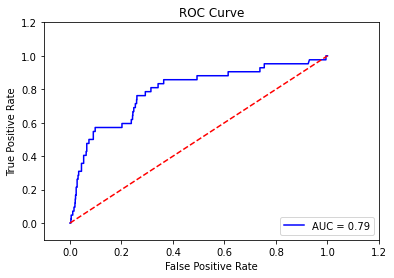

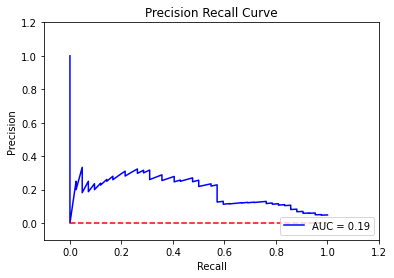

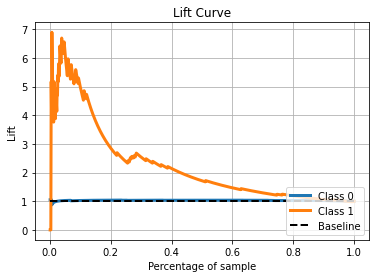

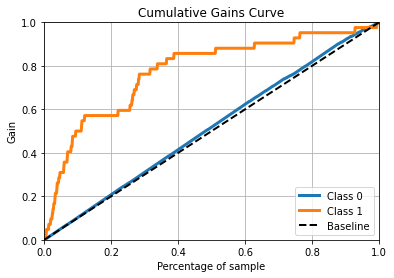

In [605]:
#Finding AUC and plotting ROC curve for positive class
y_proba_new = []
for i in y_proba:
    y_proba_new.append(i[1])
y_proba_new = np.array(y_proba_new)

y_test_new = []

y_test_new = y_test["FTWin"]
y_test_new = np.array(y_test_new)

# AUC curve 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_new, y_proba_new)
roc_auc = auc(false_positive_rate, true_positive_rate)


#Plotting
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Precision - Recall Curve 

precision, recall, thresholds = precision_recall_curve(y_test_new, y_proba_new)
f1 = f1_score(y_test, y_predict)
ap = average_precision_score(y_test_new, y_proba_new)
auc = auc(recall, precision)
#print (f1, ap, auc)

plt.title('Precision Recall Curve')
plt.plot(recall, precision, 'b',
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,0],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

import scikitplot as skplt
skplt.metrics.plot_lift_curve(y_true = y_test_new, y_probas = y_proba)
skplt.metrics.plot_cumulative_gain(y_test_new, y_proba)